In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
IMAGE_SIZE=256
CHANNELS=3

train_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10)
train_generator=train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    )

Found 630 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
for image_batch,label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.4437593  0.4319946  0.49866128]
  [0.5784619  0.5666972  0.63336384]
  [0.55395997 0.54219526 0.6088619 ]
  ...
  [0.69256324 0.6886416  0.75138676]
  [0.6920534  0.6881318  0.7508769 ]
  [0.69154364 0.6876221  0.75036716]]

 [[0.4350929  0.4233282  0.48999488]
  [0.5560312  0.5442665  0.6109332 ]
  [0.57129276 0.55952805 0.6261947 ]
  ...
  [0.68259    0.67866844 0.74141353]
  [0.6800411  0.6761195  0.7388646 ]
  [0.67749214 0.6735706  0.73631567]]

 [[0.4264265  0.4146618  0.4813285 ]
  [0.5336005  0.5218358  0.58850247]
  [0.58862555 0.57686085 0.6435275 ]
  ...
  [0.67654    0.67261845 0.7353636 ]
  [0.6785792  0.67465764 0.73740274]
  [0.6806184  0.67669684 0.73944193]]

 ...

 [[0.41517693 0.40341222 0.4700789 ]
  [0.40651053 0.39474583 0.4614125 ]
  [0.39784414 0.38607943 0.4527461 ]
  ...
  [0.56971204 0.5657905  0.62853557]
  [0.551183   0.5472614  0.6100065 ]
  [0.55693346 0.5530119  0.615757  ]]

 [[0.3476952  0.3359305  0.40259716]
  [0.338519   0.3267543  0.39342096]


In [8]:
validation_datagenerator=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10)
validation_generator=validation_datagenerator.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    )

Found 90 images belonging to 3 classes.


In [9]:
test_datagenerator=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10)
test_generator=test_datagenerator.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    )

Found 180 images belonging to 3 classes.


In [10]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [9]:
90/32

2.8125

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:

history=model.fit(
    train_generator,
steps_per_epoch=19,
batch_size=32,
validation_data=validation_generator,
validation_steps=2,
verbose=1,
epochs=20)

Epoch 1/20
19/19 [==============================] - 33s 2s/step - loss: 1.0675 - accuracy: 0.3963 - val_loss: 0.9752 - val_accuracy: 0.5469
Epoch 2/20
19/19 [==============================] - 34s 2s/step - loss: 0.8474 - accuracy: 0.5853 - val_loss: 0.7557 - val_accuracy: 0.6875
Epoch 3/20
19/19 [==============================] - 34s 2s/step - loss: 0.5988 - accuracy: 0.7191 - val_loss: 0.5169 - val_accuracy: 0.7031
Epoch 4/20
19/19 [==============================] - 34s 2s/step - loss: 0.4515 - accuracy: 0.7926 - val_loss: 0.3203 - val_accuracy: 0.8750
Epoch 5/20
19/19 [==============================] - 34s 2s/step - loss: 0.4094 - accuracy: 0.8244 - val_loss: 0.3201 - val_accuracy: 0.8438
Epoch 6/20
19/19 [==============================] - 35s 2s/step - loss: 0.3641 - accuracy: 0.8378 - val_loss: 0.3441 - val_accuracy: 0.8438
Epoch 7/20
19/19 [==============================] - 35s 2s/step - loss: 0.4026 - accuracy: 0.8378 - val_loss: 0.2853 - val_accuracy: 0.8906
Epoch 8/20
19/19 [==

In [13]:
scores=model.evaluate(test_generator)

6/6 [==============================] - 4s 616ms/step - loss: 0.1172 - accuracy: 0.9500


In [14]:
scores

[0.11721191555261612, 0.949999988079071]

In [15]:
history

In [16]:
history.params


{'verbose': 1, 'epochs': 20, 'steps': 19}

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
history.history['accuracy']

[0.39632105827331543,
 0.5852842926979065,
 0.7190635204315186,
 0.7926421165466309,
 0.8244147300720215,
 0.8377926349639893,
 0.8377926349639893,
 0.8946488499641418,
 0.8678929805755615,
 0.8896321058273315,
 0.9113712310791016,
 0.9130434989929199,
 0.9364548325538635,
 0.9030100107192993,
 0.9481605291366577,
 0.928093671798706,
 0.9515050053596497,
 0.9548494815826416,
 0.9481605291366577,
 0.9615384340286255]

In [19]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

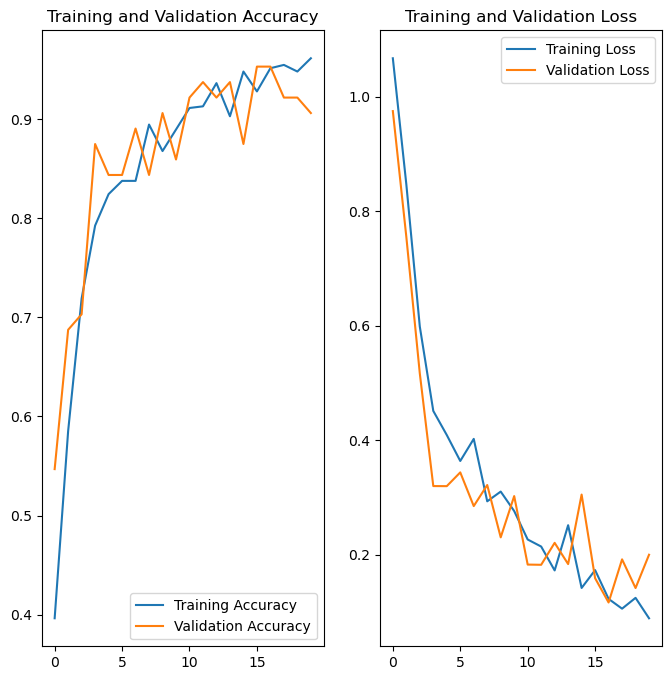

In [20]:
EPOCHS=20
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: Potato___healthy
1/1 [==============================] - 0s 413ms/step
predicted label: Potato___healthy


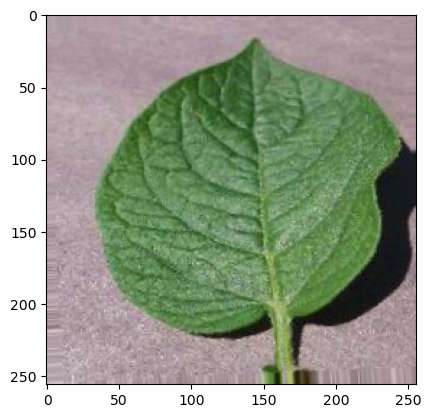

In [21]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [22]:
#write fun for inference
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 33ms/step


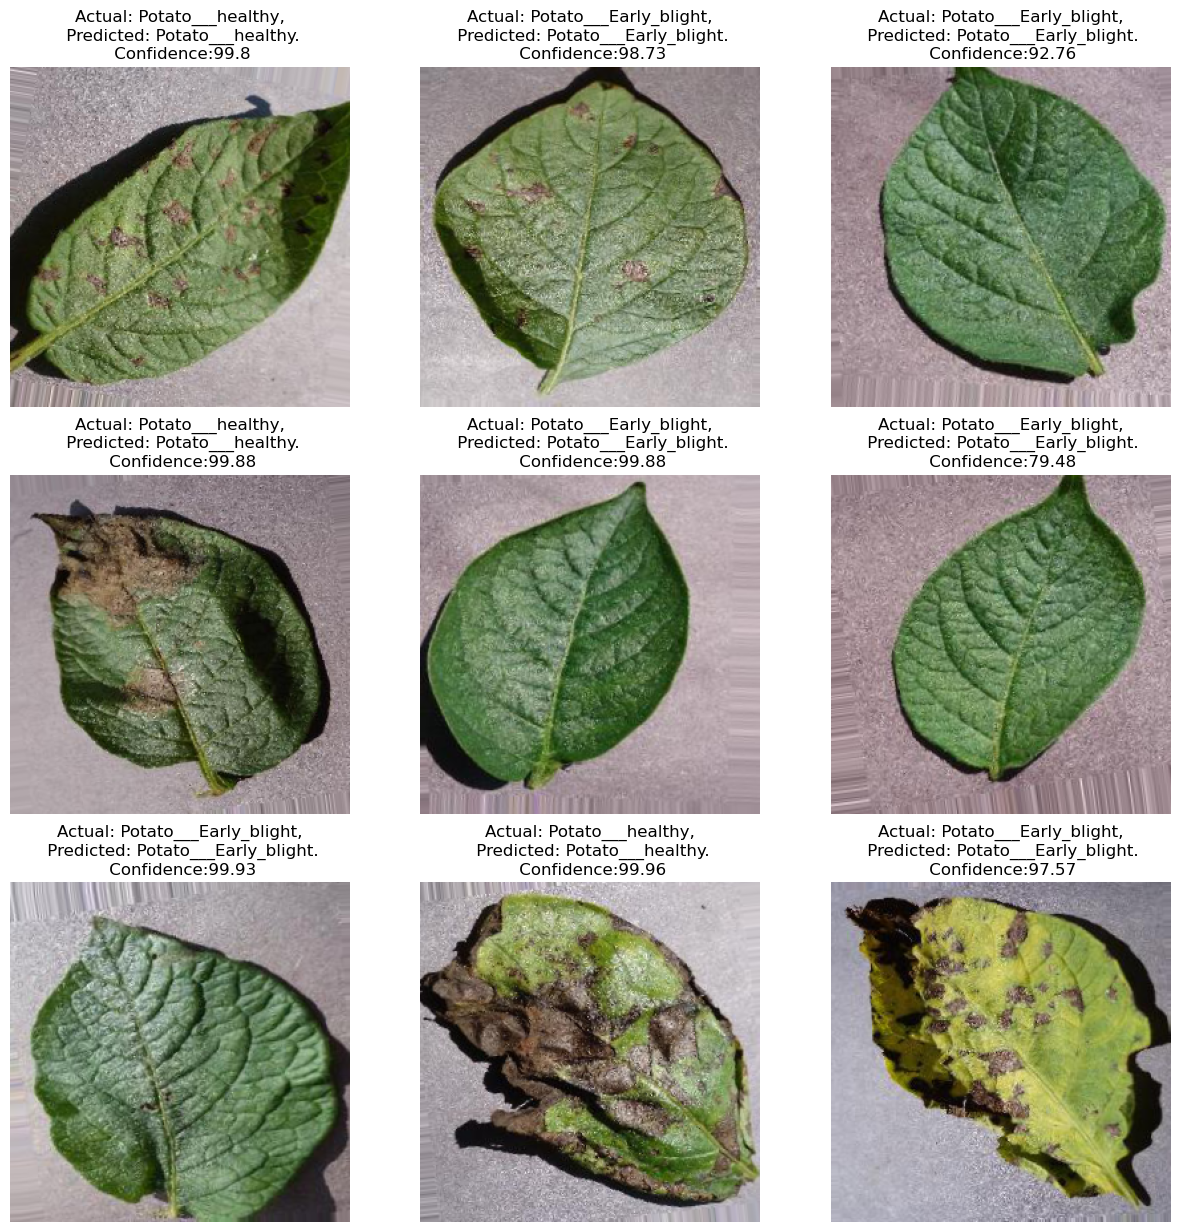

In [24]:
plt.figure(figsize=(15,15))
for images,labels in test_generator:
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image[i])
        
        predicted_class, confidence=predict(model, images[i])
        actual_class=class_names[int(labels[i])]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence:{confidence}")
        plt.axis("off")
    break
   

In [26]:
model.save("../8.Potatoe_disease.h5")